# Internet News and Consumer Engagement

In [1]:
import pandas as pd
news = pd.read_csv("news_articles.csv", index_col=0)
print(news.shape)
news.head(100)

(10437, 14)


source_id  ... engagement_comment_plugin_count
0              reuters  ...                             0.0
1      the-irish-times  ...                             0.0
2      the-irish-times  ...                             NaN
3   al-jazeera-english  ...                             0.0
4             bbc-news  ...                             0.0
..                 ...  ...                             ...
95  the-new-york-times  ...                             0.0
96            newsweek  ...                             0.0
97            newsweek  ...                             0.0
98            abc-news  ...                             0.0
99             reuters  ...                             0.0

[100 rows x 14 columns]

## Data dictionary

|    | Variable                        | Description                                                                  |
|---:|:--------------------------------|:-----------------------------------------------------------------------------|
|  0 | source_id                       | publisher unique identifier                                                  |
|  1 | source_name                     | human-readable publisher name                                                |
|  2 | author                          | article author                                                               |
|  3 | title                           | article headline                                                             |
|  4 | description                     | article short description                                                    |
|  5 | url                             | article URL from publisher website                                           |
|  6 | url_to_image                    | url to main image associated with the article                                |
|  7 | published_at                    | exact time and date of publishing the article                                |
|  8 | content                         | unformatted content of the article truncated to 260 characters               |
|  9 | top_article                     | value indicating if article was listed as a top article on publisher website |
| 10 | engagement_reaction_count       | users reactions count for posts on Facebook involving article URL            |
| 11 | engagement_comment_count        | users comments count for posts on Facebook involving article URL             |
| 12 | engagement_share_count          | users shares count for posts on Facebook involving article URL               |
| 13 | engagement_comment_plugin_count | Users comments count for Facebook comment plugin on article website          |

[Source](https://www.kaggle.com/szymonjanowski/internet-articles-data-with-users-engagement) of dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
news.describe()

top_article  ...  engagement_comment_plugin_count
count  10435.000000  ...                     10319.000000
mean       0.122089  ...                         0.011629
std        0.327404  ...                         0.268276
min        0.000000  ...                         0.000000
25%        0.000000  ...                         0.000000
50%        0.000000  ...                         0.000000
75%        0.000000  ...                         0.000000
max        1.000000  ...                        15.000000

[8 rows x 5 columns]

In [4]:
news.isnull().sum()

source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

In [5]:
# Group by publisher and author to find the count of articles published
publisher_counts = news['source_name'].value_counts()
author_counts = news['author'].value_counts()

# Group by publisher and author to find the sum of engagement_reaction
publisher_engagement_reaction = news.groupby('source_name')['engagement_reaction_count'].sum().sort_values(ascending=False)
author_engagement_reaction = news.groupby('author')['engagement_reaction_count'].sum().sort_values(ascending=False)

#Group by engagement_comment_count
publisher_engagement_comment = news.groupby('source_name')['engagement_comment_count'].sum().sort_values(ascending=False)
author_engagement_comment = news.groupby('author')['engagement_comment_count'].sum().sort_values(ascending=False)

#Group by engagement_comment_count
publisher_engagement_share = news.groupby('source_name')['engagement_share_count'].sum().sort_values(ascending=False)
author_engagement_share = news.groupby('author')['engagement_share_count'].sum().sort_values(ascending=False)


top_publishers_by_content = publisher_counts.head(10)
top_authors_by_content = author_counts.head(10)
top_publishers_by_engagement_reaction = publisher_engagement_reaction.head(10)
top_authors_by_engagement_reaction = author_engagement_reaction.head(10)
top_publishers_by_engagement_comment= publisher_engagement_comment.head(10)
top_authors_by_engagement_comment = author_engagement_comment.head(10)
top_publishers_by_engagement_share= publisher_engagement_share.head(10)
top_authors_by_engagement_share = author_engagement_share.head(10)

print("------Top publisher by content--------")
print(top_publishers_by_content)
print("------Top authors by content----------")
print(top_authors_by_content)
print("------Top publishers by engagement reaction-------")
print(top_publishers_by_engagement_reaction)
print("------Top authors by engagement reaction----------")
print(top_authors_by_engagement_reaction)
print("------Top publishers by engagement comment----------")
print(top_publishers_by_engagement_comment)
print("------Top publishers by engagement comment----------")
print(top_authors_by_engagement_comment)
print("------Top publishers by engagement share------------")
print(top_publishers_by_engagement_share)
print("------Top publishers by engagement share------------")
print(top_authors_by_engagement_share )

------Top publisher by content--------
Reuters               1252
BBC News              1242
The Irish Times       1232
ABC News              1139
CNN                   1132
Business Insider      1048
The New York Times     986
CBS News               952
Newsweek               539
Al Jazeera English     499
Name: source_name, dtype: int64
------Top authors by content----------
The Associated Press                975
Reuters Editorial                   685
CBS News                            637
https://www.facebook.com/bbcnews    533
Al Jazeera                          312
The Irish Times                     255
BBC News                            201
CBS/AP                               69
Dan Cancian                          45
AP                                   35
Name: author, dtype: int64
------Top publishers by engagement reaction-------
source_name
CNN                        1218206.0
The New York Times          790449.0
BBC News                    545396.0
CBS News           

In [6]:
# Total engagement
news['total_engagement'] = (news['engagement_reaction_count'] + 
                            news['engagement_comment_count'] + 
                            news['engagement_share_count'] + 
                            news['engagement_comment_plugin_count'])

most_engaging_content = news.sort_values(by='total_engagement', ascending=False)
most_engaging_content.head(10)

source_id  ... total_engagement
8500                 cnn  ...         434855.0
2075            bbc-news  ...         206517.0
8834            abc-news  ...         133519.0
5092  the-new-york-times  ...         106663.0
225             bbc-news  ...          89912.0
203             bbc-news  ...          86118.0
293     business-insider  ...          84639.0
3317                 cnn  ...          80055.0
3787                 cnn  ...          73768.0
2652                 cnn  ...          70939.0

[10 rows x 15 columns]

source_id  ... total_engagement
0                 reuters  ...           2528.0
1         the-irish-times  ...             18.0
2         the-irish-times  ...              NaN
3      al-jazeera-english  ...              7.0
4                bbc-news  ...              0.0
...                   ...  ...              ...
10432            abc-news  ...              0.0
10433             reuters  ...            627.0
10434                 cnn  ...           4717.0
10435            cbs-news  ...              0.0
10436            cbs-news  ...              0.0

[10437 rows x 15 columns]

In [8]:
#Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [10]:
import re

def stemming_preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [11]:
news.title = news.title.apply(lambda x: stemming_preprocess(x))
news.description = news.description.apply(lambda x: stemming_preprocess(x))

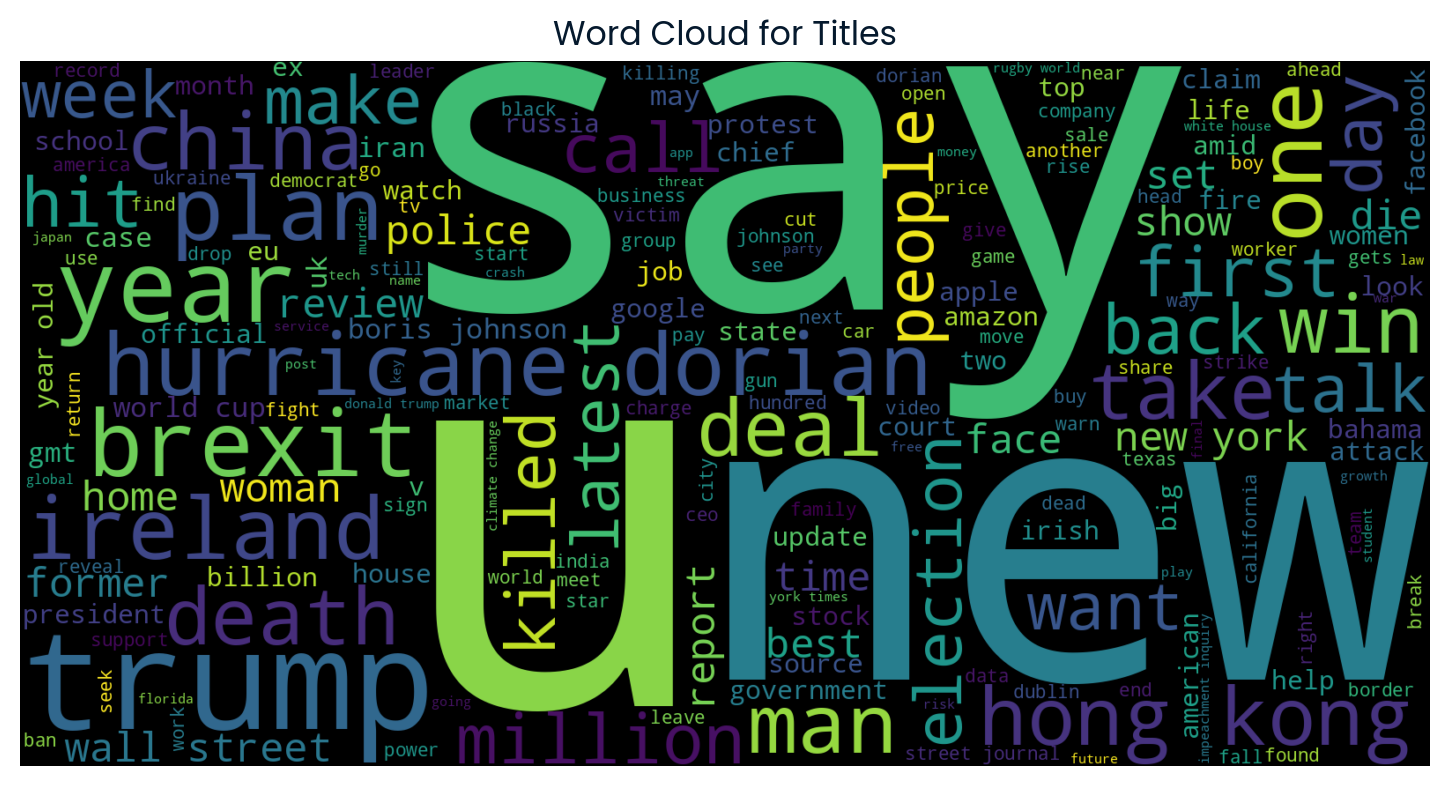

In [12]:
from wordcloud import WordCloud

# Generate word cloud for titles
plt.figure(figsize=(20, 10))
wc_title = WordCloud(max_words=200, width=1600, height=800).generate(" ".join(news.title))
plt.subplot(1, 2, 1)
plt.imshow(wc_title, interpolation='bilinear')
plt.title('Word Cloud for Titles')
plt.axis('off')
plt.show()

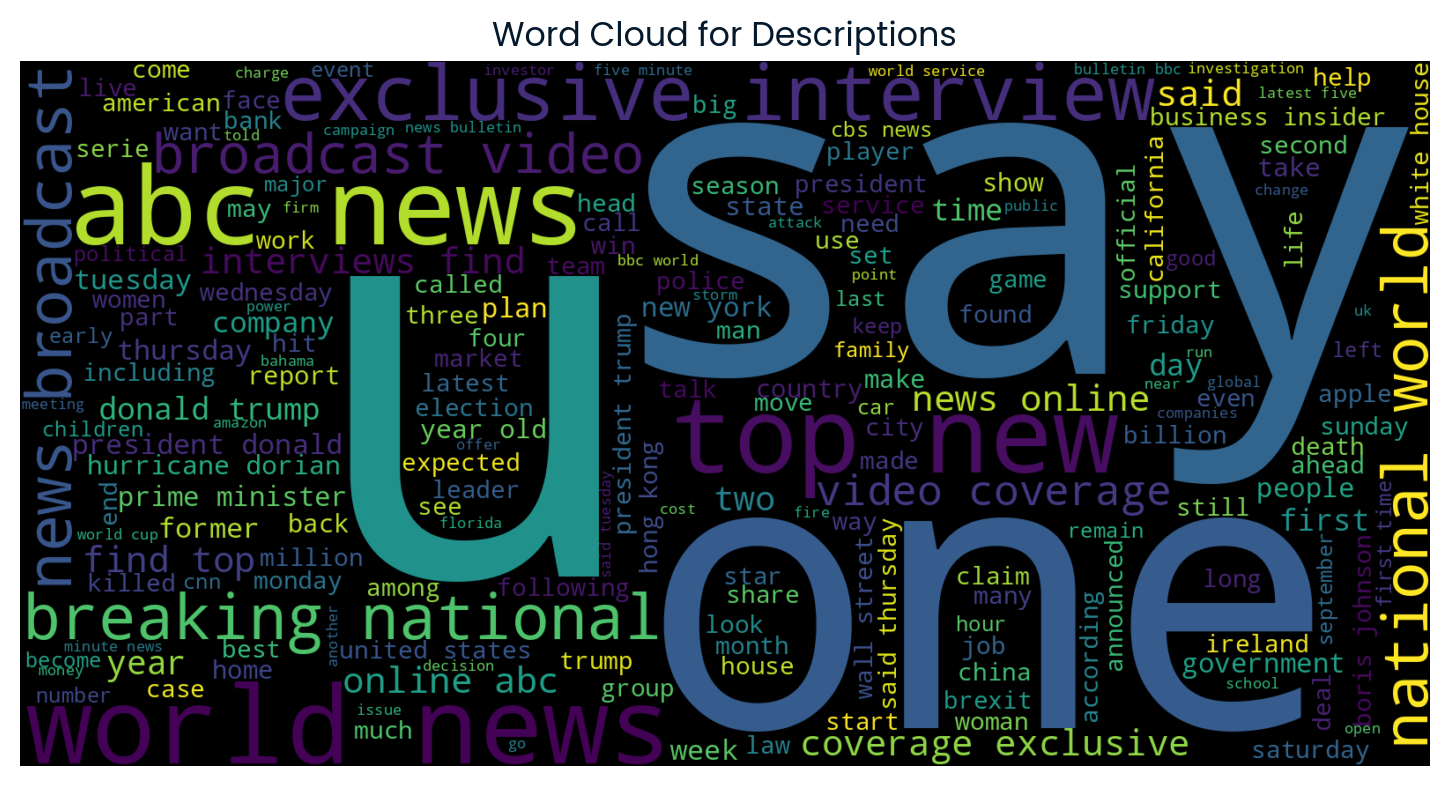

In [13]:
# Generate word cloud for descriptions
plt.figure(figsize=(20, 10))
wc_description = WordCloud(max_words=200, width=1600, height=800).generate(" ".join(news.description))
plt.subplot(1, 2, 2)
plt.imshow(wc_description, interpolation='bilinear')
plt.title('Word Cloud for Descriptions')
plt.axis('off')
plt.show()

In [16]:
from collections import Counter

mean_engagement = news['total_engagement'].mean()
engagement_on_days = news[news['total_engagement'] > mean_engagement]

description_title = " ".join(engagement_on_days['title']) + " " + " ".join(engagement_on_days['description'])
processed_text = stemming_preprocess(description_title)

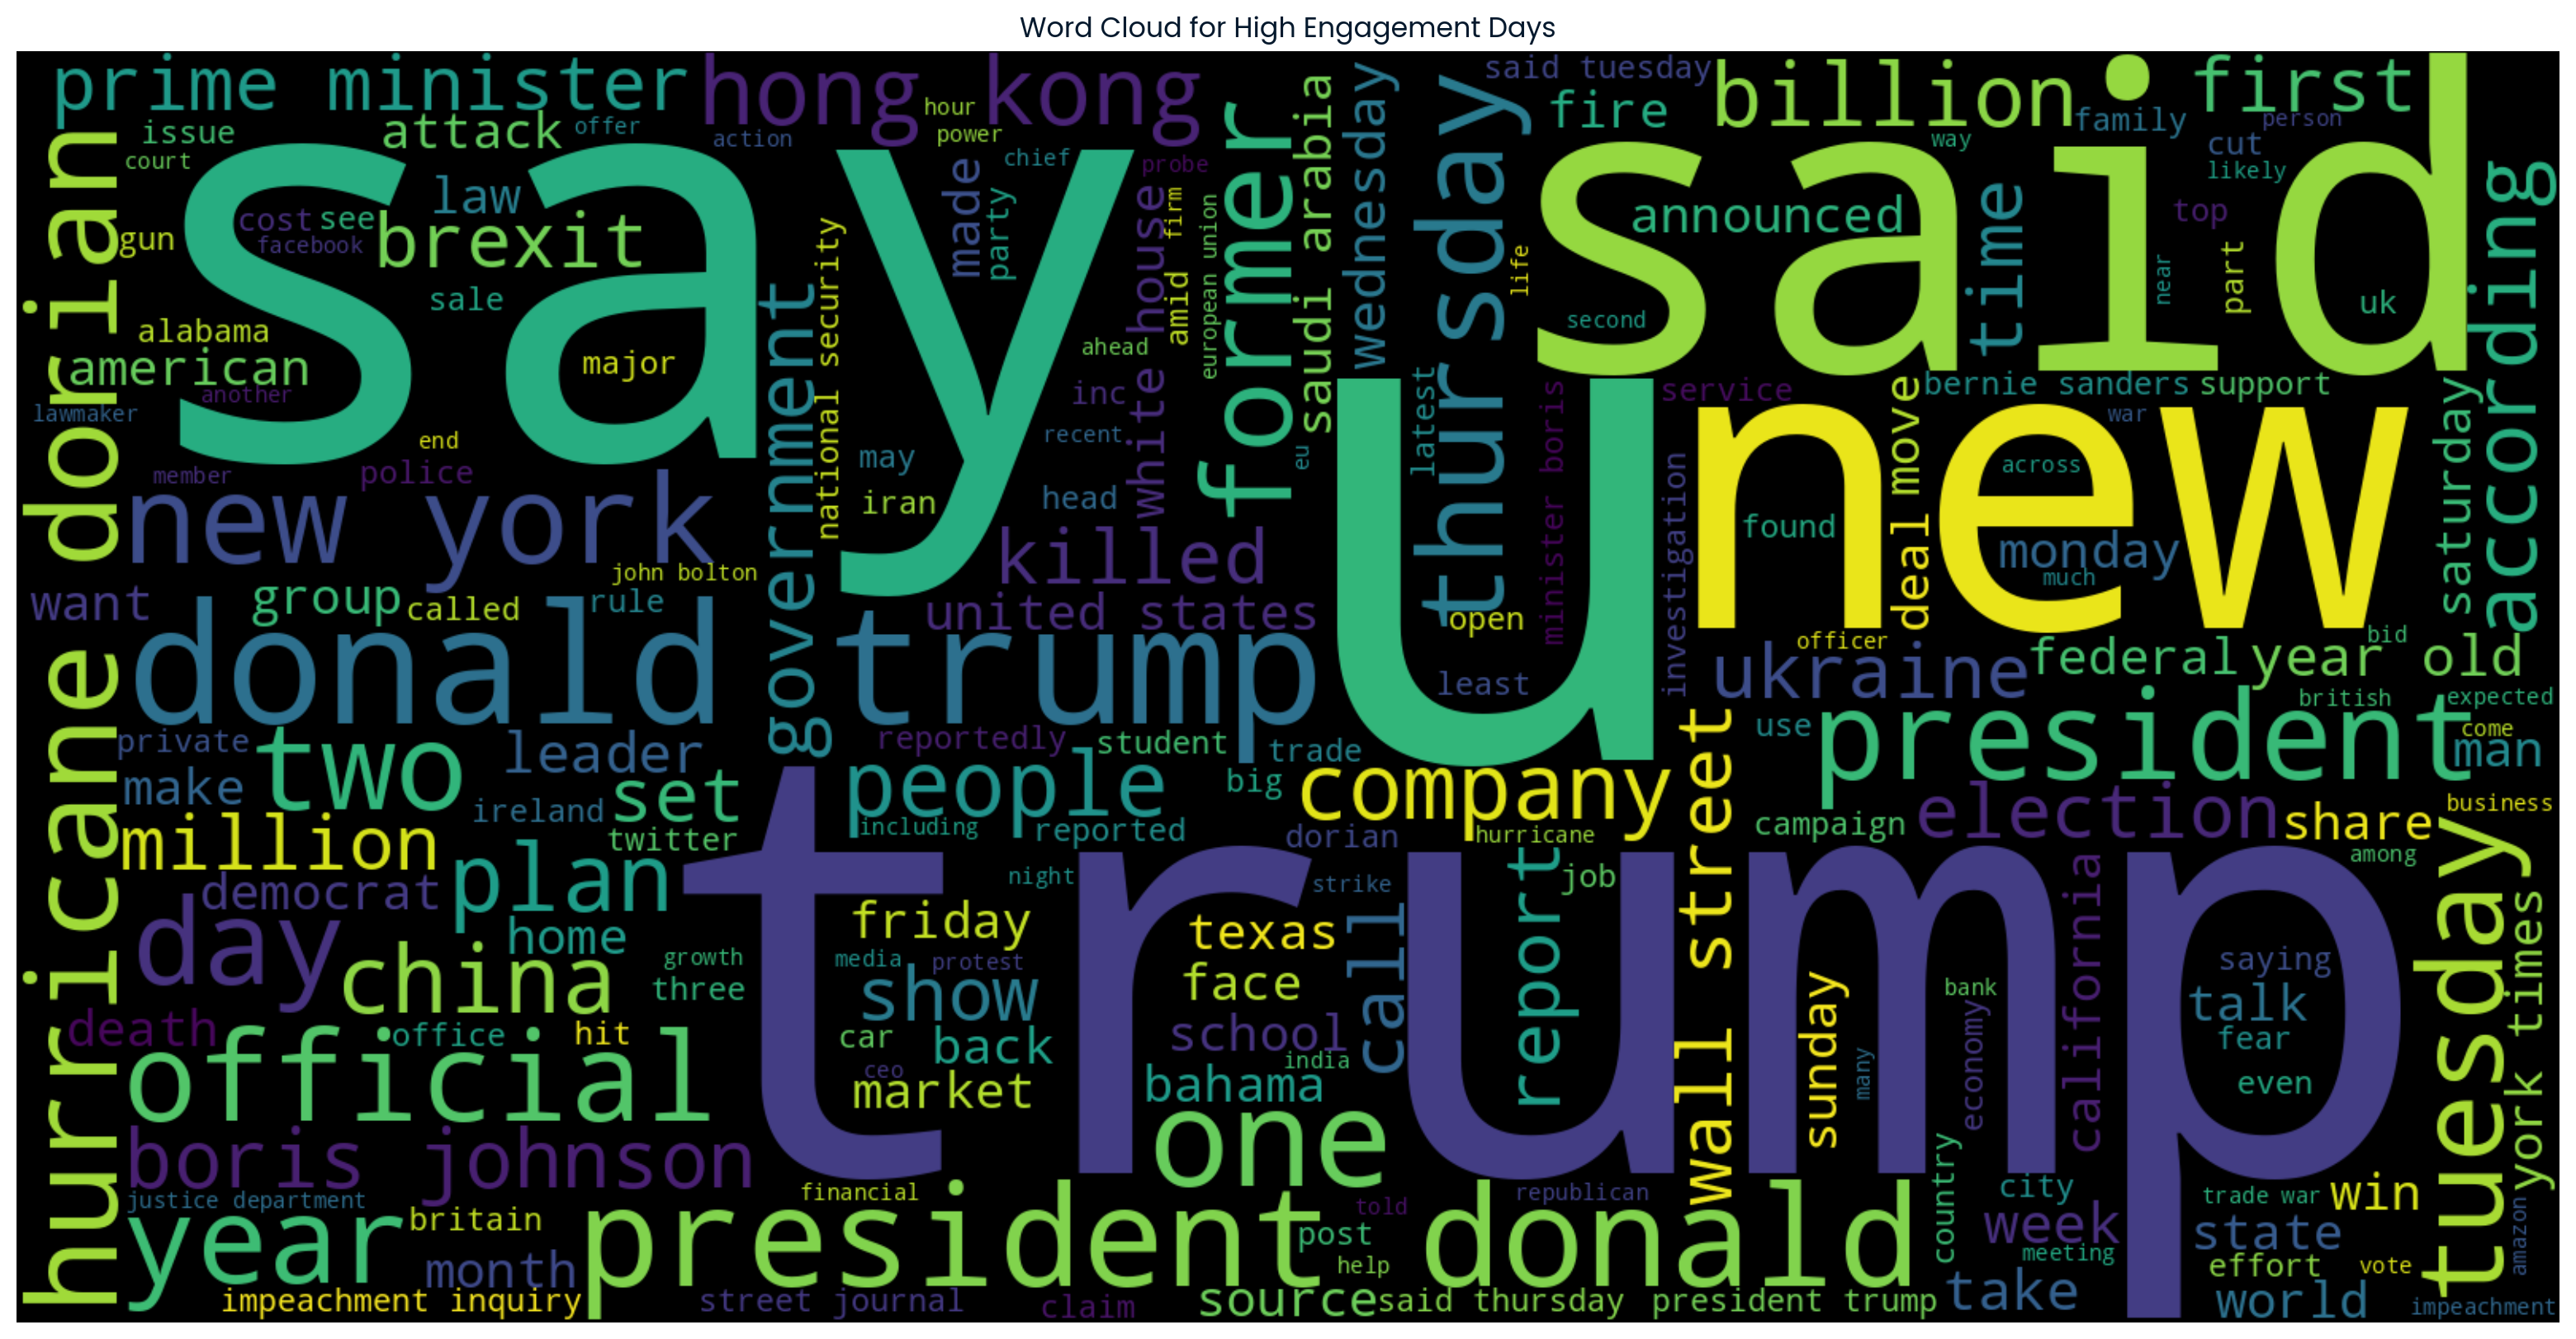

In [17]:
plt.figure(figsize=(20, 10))
wc_high_engagement = WordCloud(max_words=200, width=1600, height=800).generate(processed_text)
plt.imshow(wc_high_engagement, interpolation='bilinear')
plt.title('Word Cloud for High Engagement Days')
plt.axis('off')
plt.show()

In [18]:
word_counts = Counter(processed_text.split())
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df

Word  Frequency
0       trump        473
1   president        285
2           u        279
3        said        263
4         new        260
5        says        170
6      donald        136
7       house        135
8          us        132
9      dorian        120
10       year        119
11  hurricane        112
12      could        106
13   thursday        105
14    tuesday        102
15     brexit         98
16        one         98
17       news         97
18    johnson         94
19      first         94

In [32]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')

def identify_verbs(word):
    doc = nlp(word)
    for token in doc:
        if token.pos_ == 'VERB': 
            return True
    return False

# Apply the function to the DataFrame
common_words_df['Is_Verb'] = common_words_df['Word'].apply(identify_verbs)

# Filter the DataFrame to get only verbs
verbs_df = common_words_df[common_words_df['Is_Verb'] == True]

print(verbs_df)


   Word  Frequency  Is_Verb
3  said        263     True
5  says        170     True


In [ ]:
nlp = spacy.load('en_core_web_sm')

def identify_verbs(word):
    doc = nlp(word)
    for token in doc:
        if token.pos_ == 'VERB': 
            return True
    return False

# Apply the function to the DataFrame
common_words_df['Is_Verb'] = common_words_df['Word'].apply(identify_verbs)

# Filter the DataFrame to get only verbs
verbs_df = common_words_df[common_words_df['Is_Verb'] == True]


In [35]:
def identify_subjects(word):
    doc = nlp(word)
    for token in doc:
        if token.pos_ in ['NOUN', 'PROPN']: 
            return True
    return False


common_words_df['Is_Subject'] = common_words_df['Word'].apply(identify_subjects)
subjects_df = common_words_df[common_words_df['Is_Subject'] == True]

print(subjects_df)

         Word  Frequency  Is_Verb  Is_Subject
0       trump        473    False        True
1   president        285    False        True
2           u        279    False        True
6      donald        136    False        True
7       house        135    False        True
9      dorian        120    False        True
10       year        119    False        True
11  hurricane        112    False        True
13   thursday        105    False        True
14    tuesday        102    False        True
15     brexit         98    False        True
17       news         97    False        True
18    johnson         94    False        True


In [36]:
import random

subject = random.choice(subjects_df['Word'].tolist())  
verb = random.choice(verbs_df['Word'].tolist())
object_ = random.choice(common_words_df['Word'].tolist()) 
location_time = "on days" 

# Construct the sentence
sentence = f"{subject.capitalize()} {verb} {object_} {location_time}."
print("Generated Sentence:", sentence)

Generated Sentence: Donald says us on days.
